In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

In [89]:
np.random.seed(123)
time = np.arange(100)

# assuming zero mean 
ar1_data = np.zeros(100)

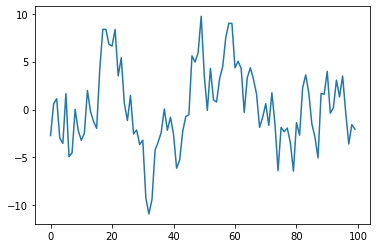

In [90]:
# Create ar1 dataset
# Set first value to a random value with expected mean of 0 and standard deviation of 2.5
ar1_data[0] += np.random.normal(loc=0, scale=2.5, size=1)

for t in time[1:]:
    ar1_data[t] = ar1_data[t-1] * 0.7 + np.random.normal(loc=0, scale=2.5, size=1)

plt.plot(ar1_data)

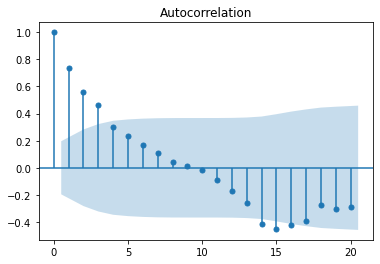

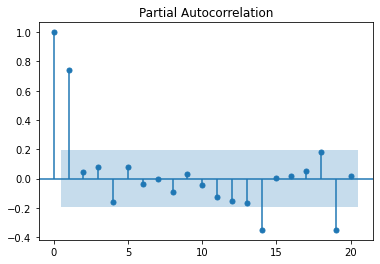

In [92]:
fig = sm.tsa.graphics.plot_acf(ar1_data)
fig = sm.tsa.graphics.plot_pacf(ar1_data)
# based on pacf graphc, pick p=1

In [93]:
# use ARMA model to fit the data 
ar_result = sm.tsa.ARMA(ar1_data, order=(1,0)).fit()
ar_result.params

array([0.13537925, 0.73323551])

In [94]:
ar_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -245.589
Method:                       css-mle   S.D. of innovations              2.810
Date:                Mon, 04 Jan 2021   AIC                            497.179
Time:                        09:52:27   BIC                            504.994
Sample:                             0   HQIC                           500.342
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1354      1.026      0.132      0.895      -1.876       2.147
ar.L1.y        0.7332      0.067     10.986      0.000       0.602       0.864
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3638           +0.0000j            1.3638            0.0000
-----------------------------------------------------------------------------
"""

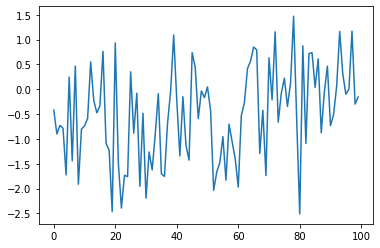

In [86]:
# generate ar2 dataset
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([0.3, 0.2, 0.1])
maparams = np.array([0])
ar3 = np.r_[1, -arparams]
ma0 = np.r_[1, maparams]
y = arma_generate_sample(ar3, ma0, 100)
plt.plot(y)

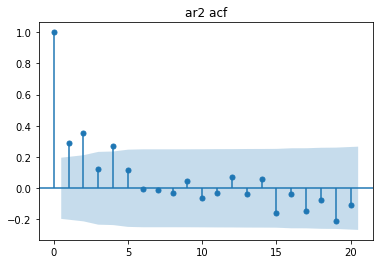

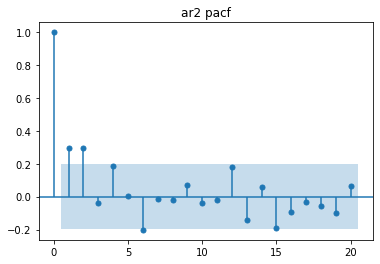

In [84]:
fig = sm.tsa.graphics.plot_acf(y, title='ar2 acf')
fig = sm.tsa.graphics.plot_pacf(y, title='ar2 pacf')
# pick p=2

In [27]:
arma_result = sm.tsa.ARMA(y, order=(2, 0)).fit(trend='nc')
arma_result.params

array([0.32759053, 0.22796983])

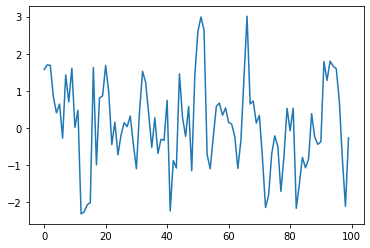

In [61]:
ar0 = np.r_[1, -np.array([0])]
ma2 = np.r_[1, np.array([0.6, 0.6])]
ma2_data = arma_generate_sample(ar0, ma2, 100)

plt.plot(ma2_data)

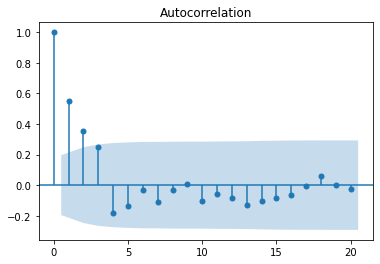

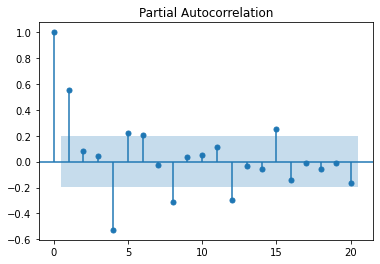

In [52]:
fig = sm.tsa.graphics.plot_acf(ma2_data)
fig = sm.tsa.graphics.plot_pacf(ma2_data)

In [101]:
for i in range(1,4):
    ma2_result = sm.tsa.ARMA(ma2_data, order=(0, i)).fit(trend='nc')
    print(f'q={i}, params: {ma2_result.params}')

    print('result summary:', ma2_result.summary(), '\n')
    
    

q=1, params: [0.37940809]
result summary:                               ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -150.113
Method:                       css-mle   S.D. of innovations              1.085
Date:                Mon, 04 Jan 2021   AIC                            304.226
Time:                        10:02:06   BIC                            309.437
Sample:                             0   HQIC                           306.335
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3794      0.075      5.087      0.000       0.233       0.526
                                    Roots                                    
           